# Benchmarcks and plots of SVM RL optim envs

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import os
import glob
import pickle

In [38]:
## All the data stored in the run folder file
run = 'run_6/'
name_dir = 'runs_optim_envs/'+run

## print info of this run
info = pickle.load(open(name_dir+'info.p', 'rb'))
for k in info.keys():
    print(k, ' : ', info[k])

alg  :  PPO
env  :  svmEnv-v2
basis_size  :  50
lambda_gae  :  0.95
gamma  :  0.99
clip  :  0.2
lr_critic  :  0.0003
lr_actor  :  0.0003
num_update  :  10
add_noise_every  :  1


In [39]:
## Example of data stored and number of episodes
rew_files = name_dir+'rew*'
num_ep = len(glob.glob(rew_files))
print('The number of episodes is then:', num_ep)

The number of episodes is then: 1


In [40]:
rew = pickle.load(open(name_dir+'rew_0.p', 'rb'))
rew

[[9.819691124826031, 8.876875077308325, 9.232291275778824],
 [6.239583966251107, 5.324340316051646, 9.285349886507248]]

In [42]:
trajs_states = pickle.load(open(name_dir+f'en_0.p', 'rb'))
trajs_states

tensor([[ 0.0000, -0.1478, -0.1343],
        [ 0.0000, -0.0963, -0.0832]])

In [44]:
trajs_acts = pickle.load(open(name_dir+f'sigmas_0.p', 'rb'))
trajs_acts = trajs_acts*55+55
trajs_acts

tensor([[[[110.0000,  78.1367,  37.8440],
          [  0.0000,  77.6525,  63.1742],
          [ 55.0256, 110.0000,   7.8693],
          [  0.0000,  88.8535,  63.7064],
          [  2.1836,  56.0612,  96.9052],
          [ 52.2892,  74.5858,  50.4598],
          [ 44.0092,   1.8433,  47.5647],
          [  8.7634,  32.6948,   9.6825],
          [ 19.2788,  82.0590, 106.4759],
          [  0.0000,  33.7662,  65.7759],
          [ 77.6510,  64.0819,  50.3810],
          [  6.2106,  29.0131,  60.2274],
          [ 62.6778,  59.8671,  12.8567],
          [ 67.5406, 109.1790,   0.0000],
          [  0.3089, 110.0000, 110.0000],
          [  1.4039,  73.6547,  28.4947],
          [  5.1328,  57.0723,  38.3868],
          [ 32.0231,  42.3203,  58.1405],
          [ 75.9194,  39.1334,  57.5160],
          [105.4486,  96.4994,  83.8701],
          [  3.4539,  31.4648,  27.5080],
          [ 68.8606, 110.0000,  60.4114],
          [ 64.8486,  91.8758,  51.7311],
          [ 12.5410, 110.0000,   0

tensor([[110.0000,  78.1367,  37.8440],
        [  0.0000,  77.6525,  63.1742],
        [ 55.0256, 110.0000,   7.8693],
        [  0.0000,  88.8535,  63.7064],
        [  2.1836,  56.0612,  96.9052],
        [ 52.2892,  74.5858,  50.4598],
        [ 44.0092,   1.8433,  47.5647],
        [  8.7634,  32.6948,   9.6825],
        [ 19.2788,  82.0590, 106.4759],
        [  0.0000,  33.7662,  65.7759],
        [ 77.6510,  64.0819,  50.3810],
        [  6.2106,  29.0131,  60.2274],
        [ 62.6778,  59.8671,  12.8567],
        [ 67.5406, 109.1790,   0.0000],
        [  0.3089, 110.0000, 110.0000],
        [  1.4039,  73.6547,  28.4947],
        [  5.1328,  57.0723,  38.3868],
        [ 32.0231,  42.3203,  58.1405],
        [ 75.9194,  39.1334,  57.5160],
        [105.4486,  96.4994,  83.8701],
        [  3.4539,  31.4648,  27.5080],
        [ 68.8606, 110.0000,  60.4114],
        [ 64.8486,  91.8758,  51.7311],
        [ 12.5410, 110.0000,   0.0000],
        [  0.0000,  27.1368,  99.1400],


The max score is at episode 0 and is equal to 57.31992125698839
The min score is at episode 0 and is equal to 57.31992125698839


Text(0.5, 0, 'Episode #')

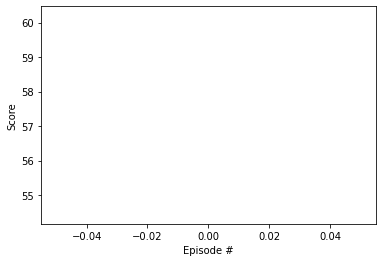

In [5]:
## Score data analysis

scores = np.zeros(num_ep)
for i in range(num_ep):
    rew = pickle.load(open(name_dir+f'rew_{i}.p', 'rb'))
    scores[i] = np.sum(rew)
    
## Max and min
index_max = np.argmax(scores)
index_min = np.argmin(scores)
print(f'The max score is at episode {index_max} and is equal to {scores[index_max]}')
print(f'The min score is at episode {index_min} and is equal to {scores[index_min]}')
    
## Plot scores    
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')

This episode collected a score of =  1982.2823182266673


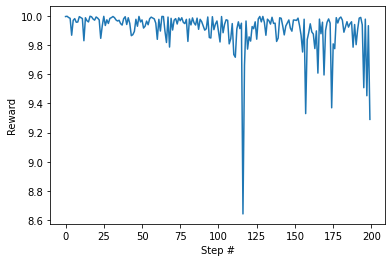

In [53]:
## Rewards of episode with max score
file_rew_max = name_dir+f'rew_{index_max}.p'
rew_max = pickle.load(open(file_rew_max, 'rb'))
plt.plot(np.arange(len(rew_max)), rew_max)
plt.ylabel('Reward')
plt.xlabel('Step #')

print('This episode collected a score of = ', np.sum(rew_max))

The last energy of the episode with max score is =  -0.14023


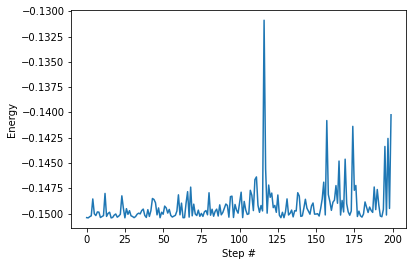

In [54]:
## Plot energies of episode with max score
file_en_max = name_dir+f'en_{index_max}.p'
en_max = pickle.load(open(file_en_max, 'rb'))
plt.plot(np.arange(len(en_max)), en_max)
plt.ylabel('Energy')
plt.xlabel('Step #')

print('The last energy of the episode with max score is = ', en_max[-1])

The last prin dim of the episode with max score is =  104


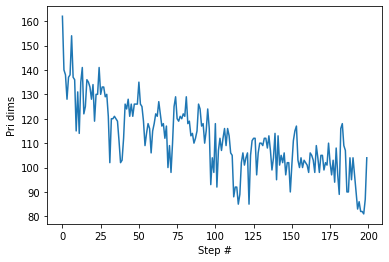

In [55]:
## Plot princip dim of episode with max score

file_pri_max = name_dir+f'pri_dim_{index_max}.p'
pri_max = pickle.load(open(file_pri_max, 'rb'))
plt.plot(np.arange(len(pri_max)), pri_max)
plt.ylabel('Pri dims')
plt.xlabel('Step #')

print('The last prin dim of the episode with max score is = ', pri_max[-1])

The last full dim of the episode with max score is =  104


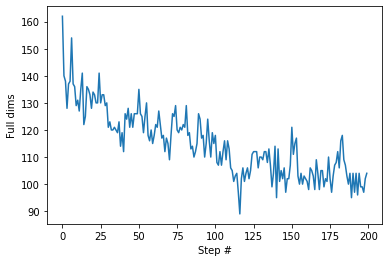

In [56]:
## Plot full dim of episode with max score

file_full_max = name_dir+f'full_dim_{index_max}.p'
full_max = pickle.load(open(file_full_max, 'rb'))
plt.plot(np.arange(len(full_max)), full_max)
plt.ylabel('Full dims')
plt.xlabel('Step #')

print('The last full dim of the episode with max score is = ', full_max[-1])

(array([35.,  6., 27., 59., 21., 29., 45.,  6., 11., 11.]),
 array([    0.,  3630.,  7260., 10890., 14520., 18150., 21780., 25410.,
        29040., 32670., 36300.], dtype=float32),
 <BarContainer object of 10 artists>)

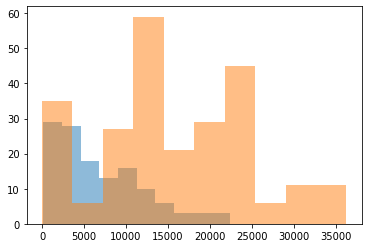

In [57]:
## Sigmas analysis (comparing with random and the one collected in the epsidoe with max score)

sigmas_random = np.loadtxt('sigmas_random.out')
sigmas_random_squared = sigmas_random[:,0]**2 + sigmas_random[:,1]**2 + sigmas_random[:,2]**2

file_sigmas_max = name_dir+f'sigmas_{index_max}.p'
sigmas_rl = pickle.load(open(file_sigmas_max, 'rb'))[-1]
sigmas_rl = sigmas_rl * 55.0 + 55.0

sigmas_rl_squared = sigmas_rl[:,0]**2 + sigmas_rl[:,1]**2 + sigmas_rl[:,2]**2

plt.hist(sigmas_random_squared, bins=10, alpha=0.5)
plt.hist(sigmas_rl_squared, bins=10, alpha=0.5)

This episode collected a score of =  19.993894435095733


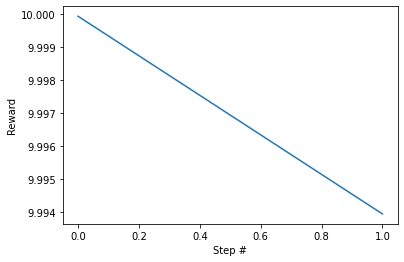

In [58]:
## Rewards of episode with min score
file_rew_min = name_dir+f'rew_{index_min}.p'
rew_min = pickle.load(open(file_rew_min, 'rb'))
plt.plot(np.arange(len(rew_min)), rew_min)
plt.ylabel('Reward')
plt.xlabel('Step #')

print('This episode collected a score of = ', np.sum(rew_min))

The last energy of the episode with min score is =  -0.14023


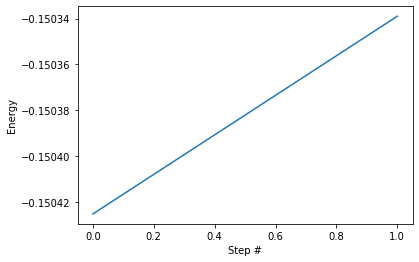

In [59]:
## Plot energies of episode with min score
file_en_min = name_dir+f'en_{index_min}.p'
en_min = pickle.load(open(file_en_min, 'rb'))
plt.plot(np.arange(len(en_min)), en_min)
plt.ylabel('Energy')
plt.xlabel('Step #')

print('The last energy of the episode with min score is = ', en_max[-1])

The last prin dim of the episode with min score is =  148


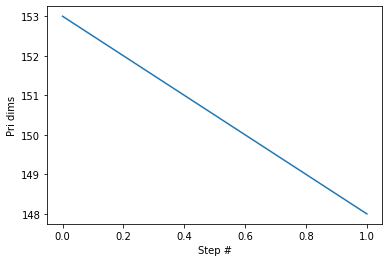

In [48]:
## Plot princip dim of episode with min score

file_pri_min = name_dir+f'pri_dim_{index_min}.p'
pri_min = pickle.load(open(file_pri_min, 'rb'))
plt.plot(np.arange(len(pri_min)), pri_min)
plt.ylabel('Pri dims')
plt.xlabel('Step #')

print('The last prin dim of the episode with min score is = ', pri_min[-1])

The last full dim of the episode with max score is =  157


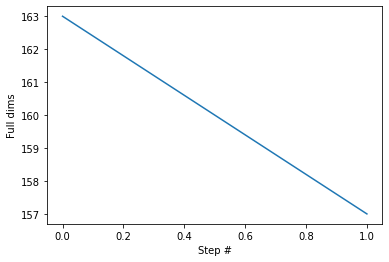

In [49]:
## Plot full dim of episode with min score

file_full_min = name_dir+f'full_dim_{index_min}.p'
full_min = pickle.load(open(file_full_min, 'rb'))
plt.plot(np.arange(len(full_min)), full_min)
plt.ylabel('Full dims')
plt.xlabel('Step #')

print('The last full dim of the episode with max score is = ', full_min[-1])

(array([29.,  7., 26., 69., 15., 37., 42.,  5.,  8., 12.]),
 array([    0.,  3630.,  7260., 10890., 14520., 18150., 21780., 25410.,
        29040., 32670., 36300.], dtype=float32),
 <BarContainer object of 10 artists>)

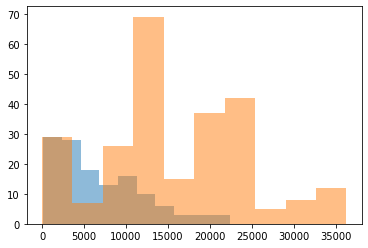

In [28]:
## Sigmas analysis (comparing with random and the one collected in the epsidoe with max score)

sigmas_random = np.loadtxt('sigmas_random.out')
sigmas_random_squared = sigmas_random[:,0]**2 + sigmas_random[:,1]**2 + sigmas_random[:,2]**2

file_sigmas_min = name_dir+f'sigmas_{index_min}.p'
sigmas_rl = pickle.load(open(file_sigmas_min, 'rb'))[-1]
sigmas_rl = sigmas_rl * 55.0 + 55.0

sigmas_rl_squared = sigmas_rl[:,0]**2 + sigmas_rl[:,1]**2 + sigmas_rl[:,2]**2

plt.hist(sigmas_random_squared, bins=10, alpha=0.5)
plt.hist(sigmas_rl_squared, bins=10, alpha=0.5)